# [作業目標]
- 使用 Day 12 剛學到的方法, 對較完整的資料生成離散化特徵
- 觀察上述離散化特徵, 對於目標值的預測有沒有幫助

# [作業重點]
- 仿照 Day 12 的語法, 將年齡資料 ('DAYS_BIRTH' 除以 365) 離散化
- 繪製上述的 "離散化標籤" 與目標值 ('TARGET') 的長條圖

In [99]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

# 設定 data_path
dir_data = './data/'

### 之前做過的處理

In [100]:
# 讀取資料檔
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)
app_train.shape

(307511, 122)

In [101]:
# 將只有兩種值的類別型欄位, 做 Label Encoder, 計算相關係數時讓這些欄位可以被包含在內
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# 檢查每一個 column
for col in app_train:
    if app_train[col].dtype == 'object':
        # 如果只有兩種值的類別型欄位
        if len(list(app_train[col].unique())) <= 2:
            # 就做 Label Encoder, 以加入相關係數檢查
            app_train[col] = le.fit_transform(app_train[col])            
print(app_train.shape)
app_train.head()

(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,F,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,M,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,F,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,M,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [102]:
# 受雇日數為異常值的資料, 另外設一個欄位記錄, 並將異常的日數轉成空值 (np.nan)
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

# 出生日數 (DAYS_BIRTH) 取絕對值 
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])

## 練習時間
參考 Day 12 範例程式，離散化你覺得有興趣的欄位，並嘗試找出有趣的訊息

# 1. 在一般畫法下
### 自動均衡分類，看不出甚麼趨勢

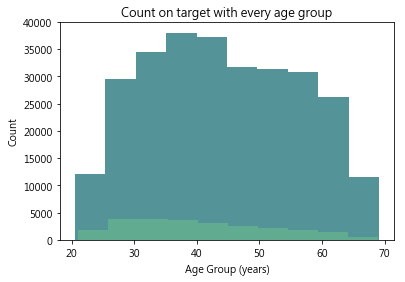

In [104]:
#一般畫法
app_train['Ages'] = app_train['DAYS_BIRTH'] / 365
for i in range(len(sort)):
    plt.hist(app_train.loc[(app_train["TARGET"] == 1), "Ages"],label = str(sort[i]),alpha = 0.5)
    plt.hist(app_train.loc[(app_train["TARGET"] == 0), "Ages"],label = str(sort[i]),alpha = 0.5)
    plt.xlabel('Age Group (years)'); plt.ylabel('Count');
    plt.title('Count on target with every age group')

---
# 2.將數據進行不同方式的離散化分組，尋找趨勢

利用cut離散，每十歲一組，每組數量不同

In [105]:
bins = np.linspace(0,100,11)
app_train['DAYS_BIRTH_CUT'] = pd.cut(app_train['DAYS_BIRTH']/365, bins)
app_train['DAYS_BIRTH_CUT'].value_counts()

(30.0, 40.0]     82308
(40.0, 50.0]     76541
(50.0, 60.0]     68062
(20.0, 30.0]     45021
(60.0, 70.0]     35579
(90.0, 100.0]        0
(80.0, 90.0]         0
(70.0, 80.0]         0
(10.0, 20.0]         0
(0.0, 10.0]          0
Name: DAYS_BIRTH_CUT, dtype: int64

### 依照每十歲分組畫圖(如下圖)，看不出甚麼趨勢。

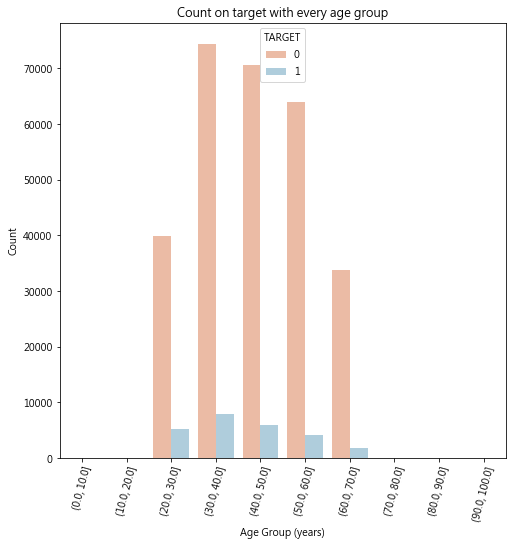

In [106]:
plt.figure(figsize = (8, 8))
sns.countplot(x = "DAYS_BIRTH_CUT", data = app_train , hue = "TARGET", palette="RdBu")
plt.xticks(rotation = 75); plt.xlabel('Age Group (years)'); plt.ylabel('Count')
plt.title('Count on target with every age group');

---
利用qcut離散自動分組，每組數量差不多

In [107]:
app_train['DAYS_BIRTH_QCUT'] = pd.qcut(app_train['DAYS_BIRTH']/365, 10)
app_train['DAYS_BIRTH_QCUT'].value_counts()

(43.151, 47.178]    30764
(28.175, 32.038]    30760
(36.0, 39.496]      30759
(51.74, 56.093]     30758
(56.093, 60.77]     30757
(20.517, 28.175]    30752
(39.496, 43.151]    30745
(32.038, 36.0]      30745
(60.77, 69.121]     30738
(47.178, 51.74]     30733
Name: DAYS_BIRTH_QCUT, dtype: int64

### 在每組數量差不多情況下，趨勢出來了：
由下圖可得知，有付錢困難的人(TARGET=1)隨著年齡上升呈現稍稍的遞減現象；而相反的(TARGET=0)則呈現稍稍的遞增現象。
<br>
顯示年輕族群較年老族群容易付不出錢(但差距不大)

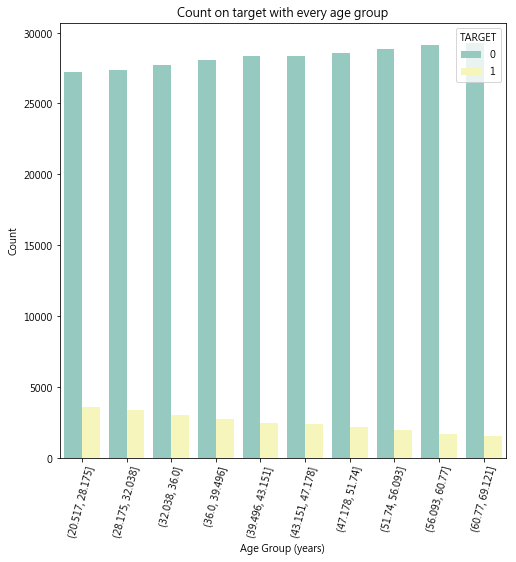

In [108]:
plt.figure(figsize = (8, 8))
sns.countplot(x = "DAYS_BIRTH_QCUT", data = app_train , hue = "TARGET", palette="Set3")
plt.xticks(rotation = 75); plt.xlabel('Age Group (years)'); plt.ylabel('Count')
plt.title('Count on target with every age group');